In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [2]:
def process_data(data):
  pca = PCA(n_components = 2)
  return pca.fit_transform(data)

In [3]:
def plot_dataset(data, target = None):
  fig, ax = plt.subplots(1, figsize = (10, 10))
  ax.scatter(data[:, 0], data[:, 1], c = target, cmap = plt.cm.Set1, edgecolor = 'k')
  plt.xlabel('Первый признак')
  plt.ylabel('Второй признак')
  plt.show()

In [4]:
def execute_data(data):
  inerts = []
  silhs = []
  ys = []
  clusternums = np.arange(2, 9, 1)

  plt.figure(figsize = (20, 20))
  ax = []

  for clusternum in clusternums:
      i = np.where(clusternums == clusternum)[0][0]
      clf = KMeans(n_clusters = clusternum)
      ys.append(clf.fit_predict(X))
      inerts.append(clf.inertia_)
      silhs.append(silhouette_score(X, clf.predict(X)))
      ax.append(plt.subplot2grid((4, 2), (int(i / 2), int(i % 2)), colspan = (1 if i < 6 else 2)))
      ax[i].scatter(X[:, 0], X[:, 1], c = ys[i], cmap = plt.cm.Set1, edgecolor = 'k')
      ax[i].set_title('Для ' + str(clusternum) + ' кластеров')
      ax[i].set(xlabel = '1 признак', ylabel = '2 признак')

  plt.tight_layout()
  plt.show()
  return inerts, silhs, clusternums

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [6]:
X = process_data(X)

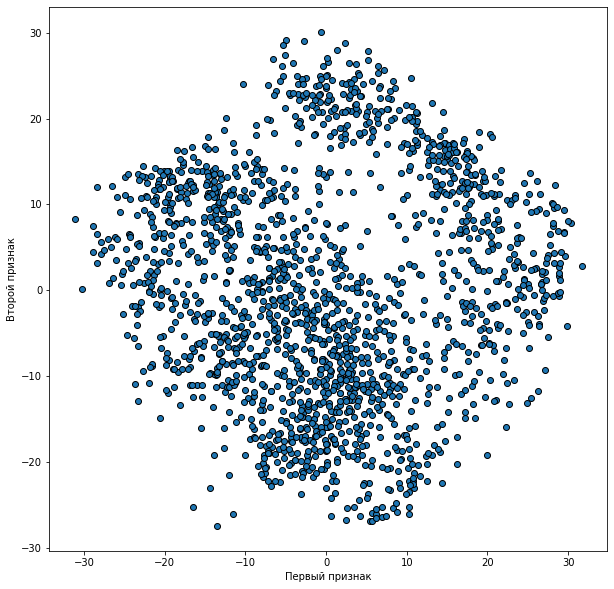

In [7]:
plot_dataset(X)

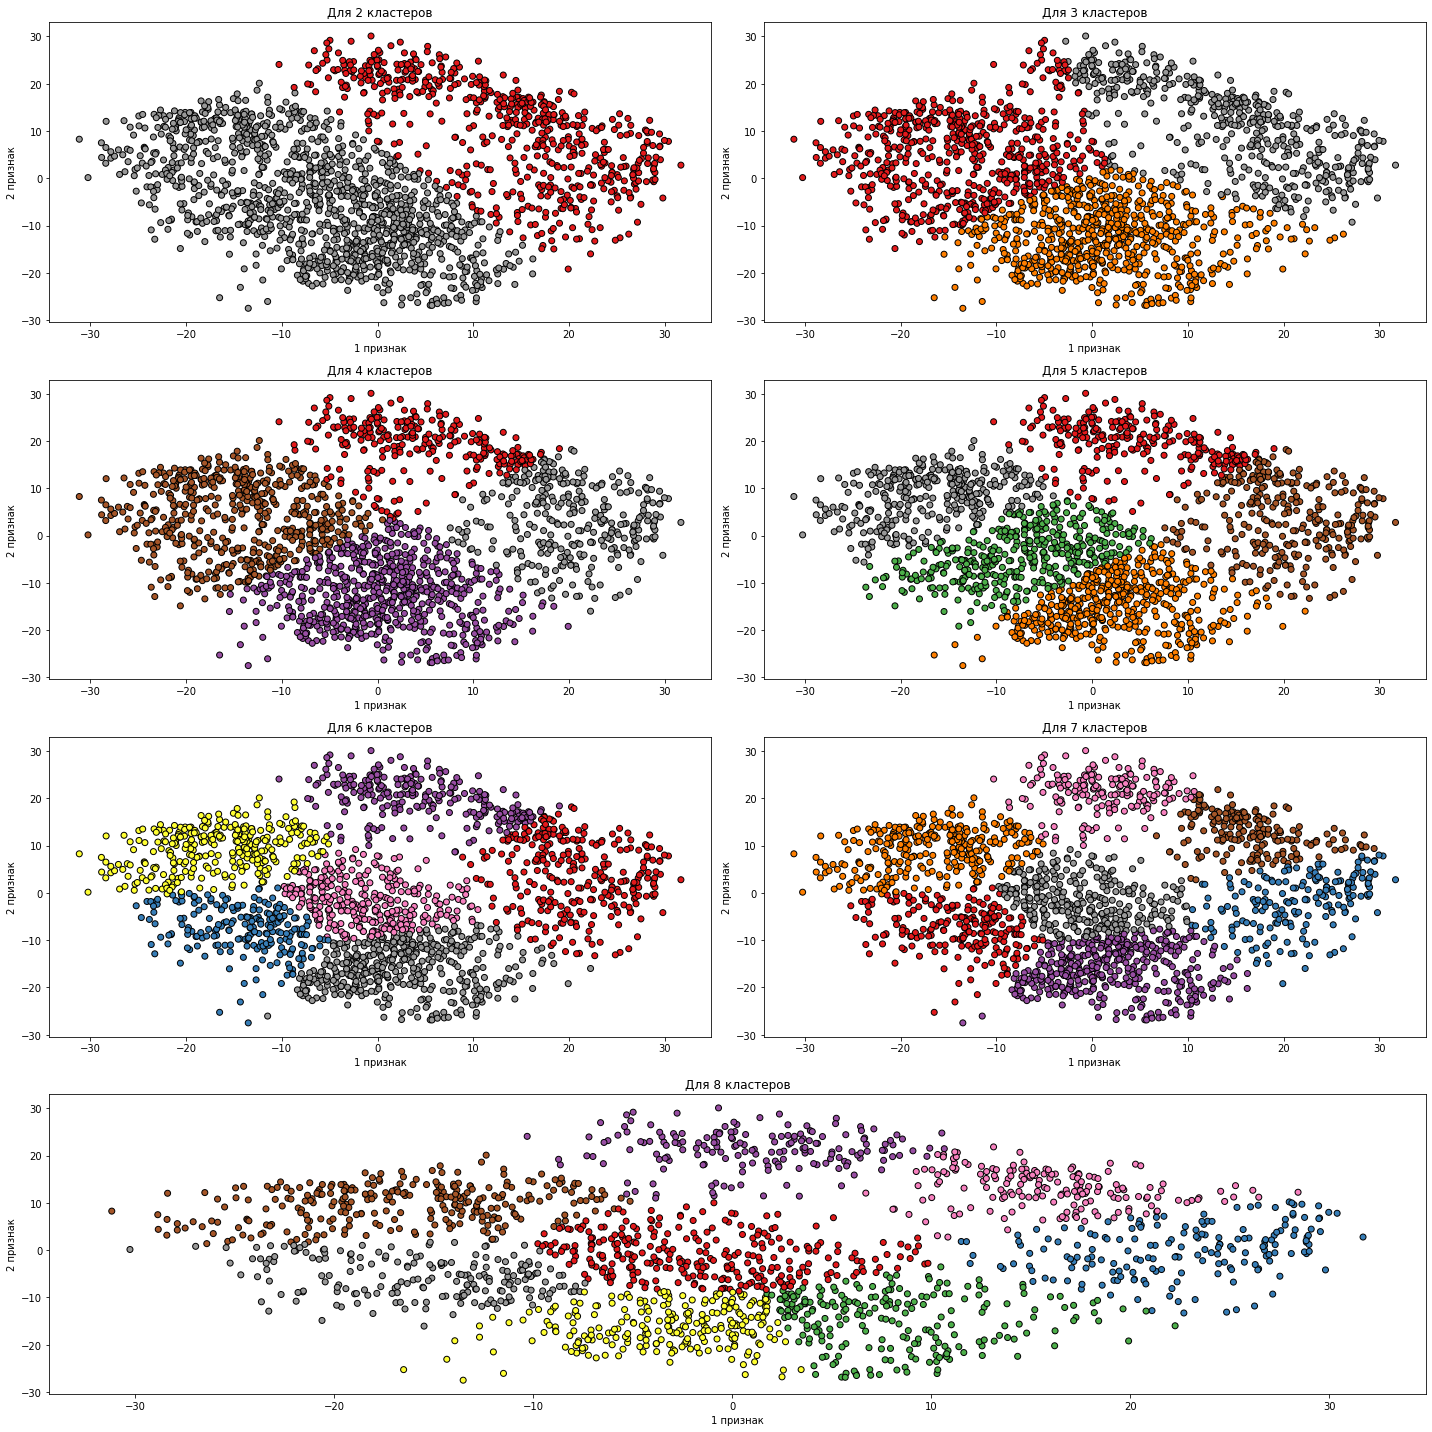

In [9]:
inerts, silhs, clusternums = execute_data(X)

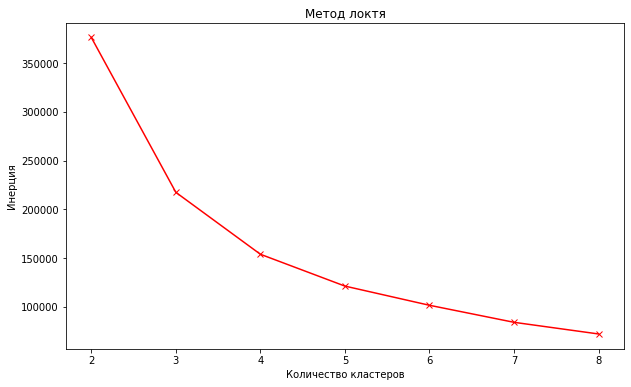

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(clusternums, inerts, 'rx-')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

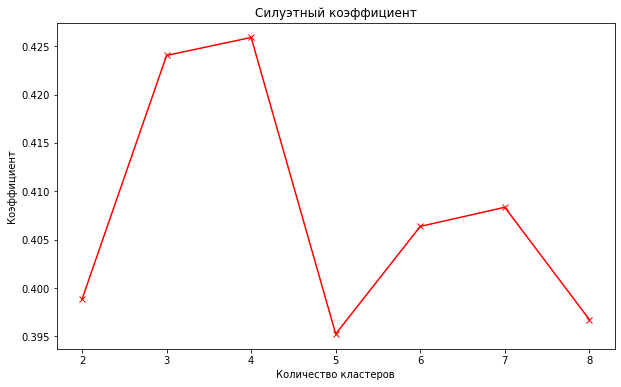

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(clusternums, silhs, 'rx-')
plt.title('Силуэтный коэффициент')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент')
plt.show()